In [1]:
import pandas as pd
import json

For the paper, we will extract the results of the previous experiments. We will use only results on Slovenian, Croatian and Macedonian part of X-GINCO, and for the results on EN-GINCO, we will remove label "Other" before calculating the scores.

## Evaluation on X-GINCO

Extracting the results from the main results file.

In [2]:
results= json.load(open("../results/results.json", "r"))

results

[{'Model': 'Dummy classifier (most frequent)',
  'Test Dataset': 'x-ginco',
  'Macro F1': 0.029329608938547486,
  'Micro F1': 0.13291139240506328,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'Maltese': {'Macro F1': 0.053156146179401995,
    'Micro F1': 0.22857142857142856},
   'Greek': {'Macro F1': 0.027777777777777776, 'Micro F1': 0.125},
   'Turkish': {'Macro F1': 0.03021978021978022, 'Micro F1': 0.1375},
   'Albanian': {'Macro F1': 0.022727272727272728, 'Micro F1': 0.1},
   'Icelandic': {'Macro F1': 0.03260869565217391, 'Micro F1': 0.15},
   'Ukrainian': {'Macro F1': 0.027777777777777776, 'Micro F1': 0.125},
   'Catalan': {'Macro F1': 0.020114942528735632, 'Micro F1': 0.0875},
   'Macedonian': {'Macro F1': 0.03260869565217391, 'Micro F1': 0.15},
   'Croatian': {'Macro F1': 0.025280898876404494, 'Micro F1': 0.1125},
   'Slovenian': {'Macro F1': 0.027777777777777776, 'Micro F1': 0.125}}},
 {'Model': 'Dummy Classifier (stratified)',
  'Test Dataset': 'en-g

In [3]:
results_ginco = []

for x in results:
	if x["Test Dataset"] == "x-ginco":
		cur_result = {}
		cur_result["Model"] = x["Model"]
		for lang in ["Slovenian", "Croatian", "Macedonian"]:
			cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang]["Macro F1"]
			cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang]["Micro F1"]
		results_ginco.append(cur_result)

results_ginco_df = pd.DataFrame(results_ginco)

results_ginco_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1)
0,Dummy classifier (most frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000
1,Dummy Classifier (stratified),0.128207,0.142857,0.054762,0.064103,0.064948,0.064935
2,Support Vector Machine,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500
3,Logistic Regression,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000
4,Naive Bayes,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522
5,fastText,0.421889,0.435897,0.168691,0.265823,0.093762,0.150000
6,[X-GENRE classifier](https://huggingface.co/cl...,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500
7,GPT-4o-mini (gpt-4o-mini-2024-07-18) (zero-shot),0.670136,0.662500,0.591834,0.575000,0.614819,0.600000
8,GPT-3.5-Turbo (zero-shot),0.641723,0.645570,0.570854,0.580645,0.593952,0.615385
9,GPT-4o (gpt-4o-2024-08-06) (zero-shot),0.694644,0.700000,0.782993,0.800000,0.722259,0.737500


In [4]:
results_ginco_df.to_json("results_ginco.json", orient="records", lines=True)

# Evaluation on EN-GINCO

Use the results from submissions, but do not use the label "Other" - so that the comparison against X-GINCO is more fair.

In [5]:
#Calculate the scores
def testing(true, pred, labels):
    from sklearn.metrics import f1_score
    """
    This function takes the list of true labels and list of predictions and evaluates the model based on comparing them.
    It calculates micro and macro F1 scores.
    
    Args:
    - y_true: list of true labels
    - y_pred: list of predicted labels

    The function returns a dictionary with micro and macro F1.
    """
    y_true = true
    y_pred = pred
    LABELS = labels

    # Calculate the scores
    macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
    micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
    #print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")
    
    return {"Micro F1": micro, "Macro F1": macro}

In [6]:
def add_predictions_to_dataset(dataset_name, results):
    """The function takes the dataset name and dataset dictionary and returns test dataset with predictions.
    Args:
    - dataset_name: should be "x-ginco" or "en-ginco"
    """
    # Load the dataset
    if dataset_name == "x-ginco":
        test_df = pd.read_json("../datasets/X-GINCO-test-set/X-GINCO.jsonl", lines=True)
    elif dataset_name == "en-ginco":
        test_df = pd.read_json("../datasets/EN-GINCO-test-dataset/EN-GINCO.jsonl", lines=True)

    # Extract predictions
    y_pred = results["predictions"][0]["predictions"]
    test_df["y_pred"] = y_pred

    return test_df

In [7]:
def add_results_without_Other(submission_path):

	with open(f"{submission_path}", "r") as sub_file:
		results = json.load(sub_file)

	# Get information on the dataset and the model
	model = results["system"]

	dataset_name = results["predictions"][0]["test"]

	test_df = add_predictions_to_dataset(dataset_name, results)

	print(test_df.shape)

	# Remove "Other"
	print("Removing 'Other' instances")
	test_df = test_df[test_df["labels"] != "Other"]
	print(test_df.shape)

	# Calculate overall results
	y_true = test_df["labels"].to_list()
	y_pred = test_df["y_pred"].to_list()
	labels = list(test_df["labels"].unique())

	current_scores = testing(y_true, y_pred, labels)

	current_res_dict = {"Model": model, "English (macro-F1)": current_scores["Macro F1"], "English (micro-F1)": current_scores["Micro F1"]}

	return current_res_dict

In [8]:
# Get paths to all the submission files
import os
directories = os.listdir("../systems")

submission_files = []

for dir in directories:
    submission_file_list = os.listdir(f"../systems/{dir}/submissions")
    submission_files.extend([f"../systems/{dir}/submissions/" + x.split("/")[-1] for x in submission_file_list])

print(submission_files)


['../systems/fasttext/submissions/submission-fastText-x-ginco.json', '../systems/fasttext/submissions/submission-fastText-en-ginco.json', '../systems/non-neural-classifiers/submissions/submission-SVC-x-ginco.json', '../systems/non-neural-classifiers/submissions/submission-COMPLEMENTNB-en-ginco.json', '../systems/non-neural-classifiers/submissions/submission-LOGISTICREGRESSION-en-ginco.json', '../systems/non-neural-classifiers/submissions/submission-LOGISTICREGRESSION-x-ginco.json', '../systems/non-neural-classifiers/submissions/submission-SVC-en-ginco.json', '../systems/non-neural-classifiers/submissions/submission-COMPLEMENTNB-x-ginco.json', '../systems/x-genre/submissions/submission-X-GENRE-en-ginco.json', '../systems/x-genre/submissions/submission-X-GENRE-x-ginco.json', '../systems/local-GPT-models/submissions/submission-deepseek-r1:14b-en-ginco.json', '../systems/local-GPT-models/submissions/submission-deepseek-r1:14b-x-ginco.json', '../systems/local-GPT-models/submissions/submissi

In [9]:
results_en_ginco = []

for file in submission_files:
	if "en-ginco" in file:
		cur_results = add_results_without_Other(file)
		results_en_ginco.append(cur_results)

(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)
(272, 5)
Removing 'Other' instances
(258, 5)


In [10]:
results_en_df = pd.DataFrame(results_en_ginco)

results_en_df

,Model,English (macro-F1),English (micro-F1)
0,fastText,0.458750,0.474308
1,COMPLEMENTNB,0.336396,0.379845
2,LOGISTICREGRESSION,0.508563,0.494118
3,SVC,0.571848,0.511628
4,X-GENRE classifier,0.749878,0.705179
5,deepseek-r1:14b,0.319003,0.275325
6,GaMS-9B-Instruct,0.286661,0.382892
7,gemma3:27b,0.623836,0.707031
8,llama3.3:latest,0.648868,0.710938
9,gemma2:27b,0.635339,0.635294


In [11]:
results_en_df.to_json("results_en_ginco.json", orient="records", lines=True)

## Merge the two datasets

In [12]:
results_en_df = pd.read_json("results_en_ginco.json", orient="records", lines=True)

results_en_df

,Model,English (macro-F1),English (micro-F1)
0,fastText,0.458750,0.474308
1,COMPLEMENTNB,0.336396,0.379845
2,LOGISTICREGRESSION,0.508563,0.494118
3,SVC,0.571848,0.511628
4,X-GENRE classifier,0.749878,0.705179
5,deepseek-r1:14b,0.319003,0.275325
6,GaMS-9B-Instruct,0.286661,0.382892
7,gemma3:27b,0.623836,0.707031
8,llama3.3:latest,0.648868,0.710938
9,gemma2:27b,0.635339,0.635294


In [13]:
results_ginco_df = pd.read_json("results_ginco.json", orient="records", lines=True)

results_ginco_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1)
0,Dummy classifier (most frequent),0.027778,0.125000,0.025281,0.112500,0.032609,0.150000
1,Dummy Classifier (stratified),0.128207,0.142857,0.054762,0.064103,0.064948,0.064935
2,Support Vector Machine,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500
3,Logistic Regression,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000
4,Naive Bayes,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522
5,fastText,0.421889,0.435897,0.168691,0.265823,0.093762,0.150000
6,[X-GENRE classifier](https://huggingface.co/cl...,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500
7,GPT-4o-mini (gpt-4o-mini-2024-07-18) (zero-shot),0.670136,0.662500,0.591834,0.575000,0.614819,0.600000
8,GPT-3.5-Turbo (zero-shot),0.641723,0.645570,0.570854,0.580645,0.593952,0.615385
9,GPT-4o (gpt-4o-2024-08-06) (zero-shot),0.694644,0.700000,0.782993,0.800000,0.722259,0.737500


In [20]:
rename_dict = {
	"Naive Bayes": "COMPLEMENTNB",
	"Logistic Regression": "LOGISTICREGRESSION",
	"Support Vector Machine": "SVC",
	"[X-GENRE classifier](https://huggingface.co/classla/xlm-roberta-base-multilingual-text-genre-classifier) ": "X-GENRE classifier",
	"[CORE register classifier](https://huggingface.co/TurkuNLP/web-register-classification-multilingual)":"CORE register classifier",
	"DeepSeek-R1 14B (zero-shot)": "deepseek-r1:14b",
	"Dummy Classifier (stratified)": "dummy-stratified",
	"Dummy classifier (most frequent)": "dummy-most_frequent",
	"GPT-3.5-Turbo (zero-shot)": "gpt-3.5-turbo-0125",
	"GPT-4o (gpt-4o-2024-08-06) (zero-shot)": "gpt-4o-2024-08-06",
	"GPT-4o-mini (gpt-4o-mini-2024-07-18) (zero-shot)": "gpt-4o-mini-2024-07-18",
	"Gemma 2 (27B) (zero-shot)": "gemma2:27b",
	"Gemma 3 (27B) (zero-shot)": "gemma3:27b",
	"Llama 3.3 (70B) (zero-shot)":"llama3.3:latest"
}

# Apply the renaming
results_ginco_df["Model"] = results_ginco_df["Model"].replace(rename_dict)

In [30]:
results_df = pd.merge(left=results_ginco_df, right=results_en_df, on="Model", how="outer")

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
0,COMPLEMENTNB,0.213524,0.300000,0.139205,0.213836,0.144146,0.163522,0.336396,0.379845
1,CORE register classifier,0.679458,0.684211,0.616019,0.632258,0.637146,0.675497,0.592571,0.612903
2,GaMS-9B-Instruct,0.458522,0.480519,0.349794,0.392157,0.263837,0.283871,0.286661,0.382892
3,LOGISTICREGRESSION,0.563193,0.560510,0.116862,0.154839,0.098782,0.125000,0.508563,0.494118
4,NLI zero-shot model ([mDeBERTa-v3-base-mnli-xn...,0.131177,0.157143,0.118561,0.169231,0.196114,0.213333,0.159701,0.231293
5,SVC,0.482661,0.493671,0.196589,0.240506,0.067235,0.137500,0.571848,0.511628
6,X-GENRE classifier,0.935625,0.937500,0.894202,0.900000,0.911118,0.912500,0.749878,0.705179
7,deepseek-r1:14b,0.180373,0.196078,0.146175,0.137255,0.147835,0.158416,0.319003,0.275325
8,dummy-most_frequent,0.027778,0.125000,0.025281,0.112500,0.032609,0.150000,0.037829,0.178295
9,dummy-stratified,0.128207,0.142857,0.054762,0.064103,0.064948,0.064935,0.101740,0.166337


In [31]:
results_df = results_df.sort_values(by="English (macro-F1)", ascending=False).round(3)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
6,X-GENRE classifier,0.936,0.938,0.894,0.900,0.911,0.913,0.750,0.705
14,gpt-4o-2024-08-06,0.695,0.700,0.783,0.800,0.722,0.738,0.737,0.771
15,gpt-4o-mini-2024-07-18,0.670,0.662,0.592,0.575,0.615,0.600,0.666,0.663
16,llama3.3:latest,0.704,0.712,0.728,0.738,0.674,0.688,0.649,0.711
11,gemma2:27b,0.644,0.616,0.561,0.588,0.541,0.538,0.635,0.635
12,gemma3:27b,0.630,0.650,0.726,0.763,0.748,0.763,0.624,0.707
1,CORE register classifier,0.679,0.684,0.616,0.632,0.637,0.675,0.593,0.613
5,SVC,0.483,0.494,0.197,0.241,0.067,0.138,0.572,0.512
13,gpt-3.5-turbo-0125,0.642,0.646,0.571,0.581,0.594,0.615,0.536,0.652
3,LOGISTICREGRESSION,0.563,0.561,0.117,0.155,0.099,0.125,0.509,0.494


In [32]:
print(results_df.to_markdown())

|    | Model                                                                                                              |   Slovenian (macro-F1) |   Slovenian (micro-F1) |   Croatian (macro-F1) |   Croatian (micro-F1) |   Macedonian (macro-F1) |   Macedonian (micro-F1) |   English (macro-F1) |   English (micro-F1) |
|---:|:-------------------------------------------------------------------------------------------------------------------|-----------------------:|-----------------------:|----------------------:|----------------------:|------------------------:|------------------------:|---------------------:|---------------------:|
|  6 | X-GENRE classifier                                                                                                 |                  0.936 |                  0.938 |                 0.894 |                 0.9   |                   0.911 |                   0.913 |                0.75  |                0.705 |
| 14 | gpt-4o-2024-08-06                

In [23]:
# Save the results

results_df.to_json("results_combined.json", orient="records", lines=True)


In [4]:
results_df = pd.read_json("results_combined.json", orient="records", lines=True)

results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
0,X-GENRE classifier,0.936,0.938,0.894,0.900,0.911,0.913,0.750,0.705
1,gpt-4o-2024-08-06,0.695,0.700,0.783,0.800,0.722,0.738,0.737,0.771
2,gpt-4o-mini-2024-07-18,0.670,0.662,0.592,0.575,0.615,0.600,0.666,0.663
3,llama3.3:latest,0.704,0.712,0.728,0.738,0.674,0.688,0.649,0.711
4,gemma2:27b,0.644,0.616,0.561,0.588,0.541,0.538,0.635,0.635
5,gemma3:27b,0.630,0.650,0.726,0.763,0.748,0.763,0.624,0.707
6,CORE register classifier,0.679,0.684,0.616,0.632,0.637,0.675,0.593,0.613
7,SVC,0.483,0.494,0.197,0.241,0.067,0.138,0.572,0.512
8,gpt-3.5-turbo-0125,0.642,0.646,0.571,0.581,0.594,0.615,0.536,0.652
9,LOGISTICREGRESSION,0.563,0.561,0.117,0.155,0.099,0.125,0.509,0.494


# Plot a bar plot

In [1]:
import pandas as pd

In [2]:
results_df = pd.read_json("results_combined.json", orient="records", lines=True)

In [3]:
results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
0,X-GENRE classifier,0.936,0.938,0.894,0.900,0.911,0.913,0.750,0.705
1,gpt-4o-2024-08-06,0.695,0.700,0.783,0.800,0.722,0.738,0.737,0.771
2,gpt-4o-mini-2024-07-18,0.670,0.662,0.592,0.575,0.615,0.600,0.666,0.663
3,llama3.3:latest,0.704,0.712,0.728,0.738,0.674,0.688,0.649,0.711
4,gemma2:27b,0.644,0.616,0.561,0.588,0.541,0.538,0.635,0.635
5,gemma3:27b,0.630,0.650,0.726,0.763,0.748,0.763,0.624,0.707
6,CORE register classifier,0.679,0.684,0.616,0.632,0.637,0.675,0.593,0.613
7,SVC,0.483,0.494,0.197,0.241,0.067,0.138,0.572,0.512
8,gpt-3.5-turbo-0125,0.642,0.646,0.571,0.581,0.594,0.615,0.536,0.652
9,LOGISTICREGRESSION,0.563,0.561,0.117,0.155,0.099,0.125,0.509,0.494


In [4]:
results_df = results_df.drop(index=[4,6, 9,10,13,14,15])

In [5]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy",
    "X-GENRE classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)


In [6]:
results_df

,Model,Slovenian (macro-F1),Slovenian (micro-F1),Croatian (macro-F1),Croatian (micro-F1),Macedonian (macro-F1),Macedonian (micro-F1),English (macro-F1),English (micro-F1)
0,Fine-Tuned XLM-R,0.936,0.938,0.894,0.900,0.911,0.913,0.750,0.705
1,GPT-4o,0.695,0.700,0.783,0.800,0.722,0.738,0.737,0.771
2,GPT-4o-mini,0.670,0.662,0.592,0.575,0.615,0.600,0.666,0.663
3,LLaMA 3.3,0.704,0.712,0.728,0.738,0.674,0.688,0.649,0.711
5,Gemma 3,0.630,0.650,0.726,0.763,0.748,0.763,0.624,0.707
7,Support Vector Machine,0.483,0.494,0.197,0.241,0.067,0.138,0.572,0.512
8,GPT-3.5-Turbo,0.642,0.646,0.571,0.581,0.594,0.615,0.536,0.652
11,Naive Bayes Classifier,0.214,0.300,0.139,0.214,0.144,0.164,0.336,0.380
12,DeepSeek-R1-Distill,0.180,0.196,0.146,0.137,0.148,0.158,0.319,0.275
16,Dummy,0.028,0.125,0.025,0.112,0.033,0.150,0.038,0.178


In [9]:
print(results_df.to_markdown(index=False))

| Model                  |   Slovenian (macro-F1) |   Slovenian (micro-F1) |   Croatian (macro-F1) |   Croatian (micro-F1) |   Macedonian (macro-F1) |   Macedonian (micro-F1) |   English (macro-F1) |   English (micro-F1) |
|:-----------------------|-----------------------:|-----------------------:|----------------------:|----------------------:|------------------------:|------------------------:|---------------------:|---------------------:|
| Fine-Tuned XLM-R       |                  0.936 |                  0.938 |                 0.894 |                 0.9   |                   0.911 |                   0.913 |                0.75  |                0.705 |
| GPT-4o                 |                  0.695 |                  0.7   |                 0.783 |                 0.8   |                   0.722 |                   0.738 |                0.737 |                0.771 |
| GPT-4o-mini            |                  0.67  |                  0.662 |                 0.592 |        

<module 'matplotlib.pyplot' from '/home/tajak/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

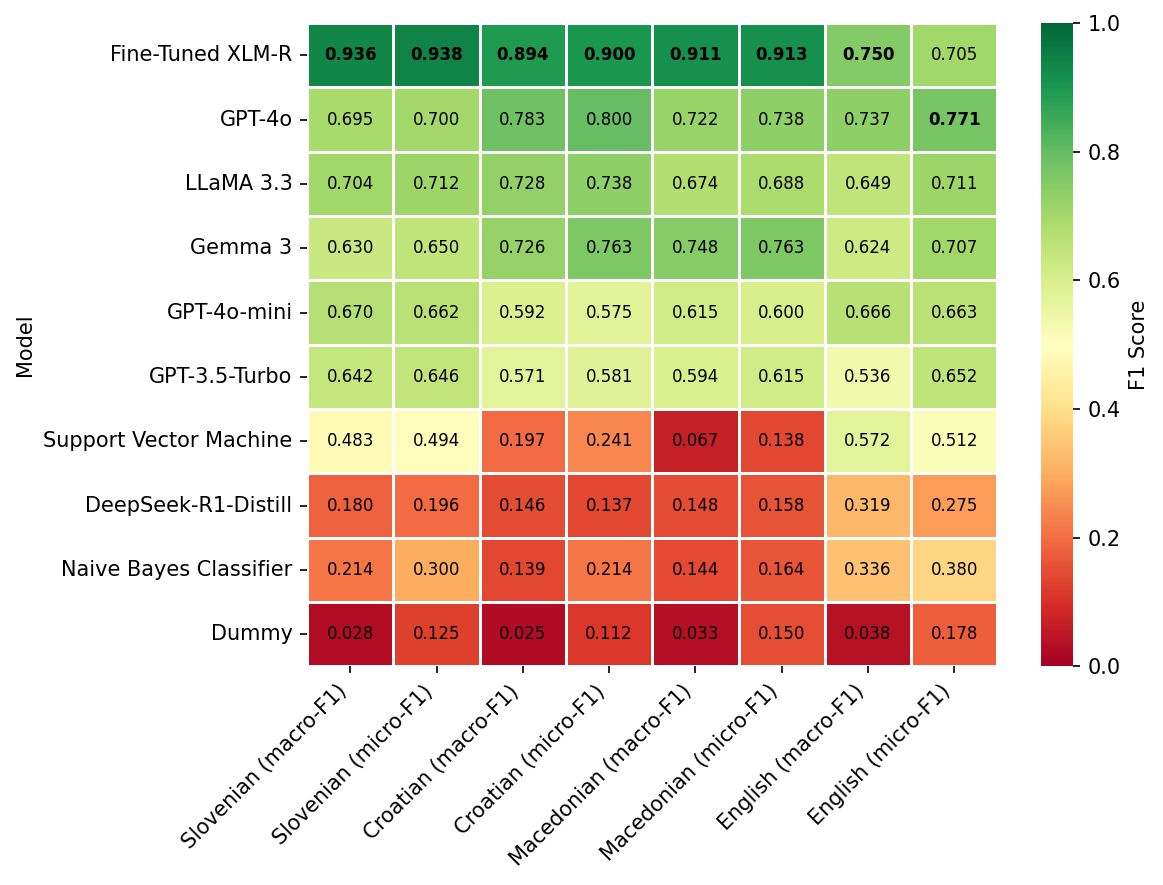

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=150)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Croatian (macro-F1)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt


## Evaluation of Distribution of Mix

In [1]:
import os
import json
import pandas as pd

In [2]:
os.chdir("..")

In [6]:
submission_folder = "systems/local-GPT-models/submissions"

In [7]:
def add_predictions_to_dataset(dataset_name, results):
    """The function takes the dataset name and dataset dictionary and returns test dataset with predictions.
    Args:
    - dataset_name: should be "x-ginco" or "en-ginco"
    """
    # Load the dataset from the hugging face
    if dataset_name == "x-ginco":
        test_df = pd.read_json("datasets/X-GINCO-test-set/X-GINCO.jsonl", lines=True)
    elif dataset_name == "en-ginco":
        test_df = pd.read_json("datasets/EN-GINCO-test-dataset/EN-GINCO.jsonl", lines=True)

    # Extract predictions
    y_pred = results["predictions"][0]["predictions"]
    test_df["y_pred"] = y_pred

    return test_df


In [8]:
# Get paths to all the submission files
submission_files = os.listdir(submission_folder)

# Evaluate all submissions in the submissions directory
for submission_file in submission_files:
	# Use only files that start with "submission"
	if "submission-" in submission_file:
		# Open the submission to be evaluated
		with open("{}/{}".format(submission_folder,submission_file), "r") as sub_file:
			results = json.load(sub_file)

			# Get information on the dataset and the model
			model = results["system"]

			dataset_name = results["predictions"][0]["test"]

			test_df = add_predictions_to_dataset(dataset_name, results)
			
			print(model)
			print(dataset_name)
			print(test_df["y_pred"].value_counts(normalize=True))

deepseek-r1:14b
en-ginco
y_pred
Other                      0.511029
Information/Explanation    0.139706
News                       0.099265
Forum                      0.073529
Opinion/Argumentation      0.073529
Prose/Lyrical              0.047794
Instruction                0.033088
Legal                      0.007353
Mix                        0.007353
Promotion                  0.007353
Name: proportion, dtype: float64
deepseek-r1:14b
x-ginco
y_pred
Other                      0.635443
Information/Explanation    0.135443
Prose/Lyrical              0.058228
Mix                        0.037975
Opinion/Argumentation      0.032911
News                       0.027848
Legal                      0.027848
Forum                      0.022785
Instruction                0.018987
Promotion                  0.002532
Name: proportion, dtype: float64
llama3.3:latest
x-ginco
y_pred
News                       0.173418
Information/Explanation    0.169620
Prose/Lyrical              0.153165
Promotion   

In [ ]:
# Get paths to all the submission files
submission_files = os.listdir(submission_folder)

submission_files

['submission-gpt-3.5-turbo-0125-IPTC-test.json',
 'submission-gpt-4o-2024-08-06-IPTC-test.json',
 'submission-gpt-4o-mini-2024-07-18-IPTC-test.json']

In [ ]:
# Evaluate all submissions in the submissions directory
for submission_file in submission_files:
	# Use only files that start with "submission"
	if "submission-" in submission_file:
		# Open the submission to be evaluated
		with open("{}/{}".format(submission_folder,submission_file), "r") as sub_file:
			results = json.load(sub_file)

		# Get information on the dataset and the model
		model = results["system"]

		dataset_name = results["predictions"][0]["test"]

		test_df = add_predictions_to_dataset(results)
			
		print(model)
		print(dataset_name)
		print(test_df["y_pred"].value_counts(normalize=True))

(1129, 5)
gpt-3.5-turbo-0125
IPTC-test
y_pred
disaster, accident and emergency incident    0.104517
lifestyle and leisure                        0.100974
economy, business and finance                0.069973
human interest                               0.069088
education                                    0.068202
politics                                     0.068202
environment                                  0.061116
arts, culture, entertainment and media       0.060230
sport                                        0.055802
science and technology                       0.054030
weather                                      0.049601
conflict, war and peace                      0.048716
health                                       0.042516
crime, law and justice                       0.041630
religion                                     0.038087
labour                                       0.035430
society                                      0.031887
Name: proportion, dtype: float64
(11